In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 95% 155M/163M [00:01<00:00, 105MB/s]
100% 163M/163M [00:01<00:00, 89.6MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_574.jpg', 'with_mask_330.jpg', 'with_mask_1997.jpg', 'with_mask_3094.jpg', 'with_mask_1363.jpg']
['with_mask_2935.jpg', 'with_mask_746.jpg', 'with_mask_1007.jpg', 'with_mask_981.jpg', 'with_mask_2690.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_630.jpg', 'without_mask_1311.jpg', 'without_mask_1644.jpg', 'without_mask_828.jpg', 'without_mask_63.jpg']
['without_mask_1558.jpg', 'without_mask_2304.jpg', 'without_mask_310.jpg', 'without_mask_3488.jpg', 'without_mask_3467.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

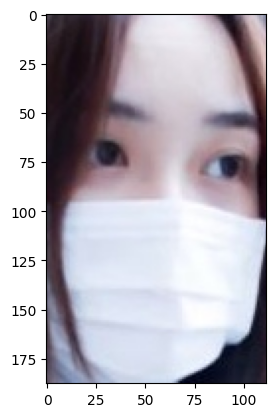

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_12.jpg')
imgplot = plt.imshow(img)
plt.show()

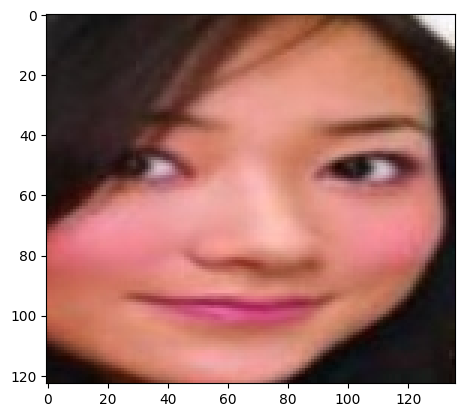

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_346.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[207, 197, 187],
        [207, 197, 187],
        [207, 197, 187],
        ...,
        [210, 202, 191],
        [210, 202, 191],
        [210, 202, 191]],

       [[207, 197, 187],
        [207, 197, 187],
        [207, 197, 187],
        ...,
        [210, 202, 191],
        [210, 202, 191],
        [210, 202, 191]],

       [[207, 197, 187],
        [207, 197, 187],
        [207, 197, 187],
        ...,
        [210, 202, 191],
        [210, 202, 191],
        [210, 202, 191]],

       ...,

       [[ 39,  38,  44],
        [ 39,  38,  44],
        [ 39,  38,  44],
        ...,
        [225, 218, 208],
        [227, 220, 210],
        [226, 219, 209]],

       [[ 39,  38,  44],
        [ 39,  38,  44],
        [ 39,  38,  44],
        ...,
        [230, 223, 213],
        [230, 223, 213],
        [228, 221, 211]],

       [[ 39,  38,  44],
        [ 39,  38,  44],
        [ 39,  38,  44],
        ...,
        [233, 226, 216],
        [232, 225, 215],
        [229, 222, 212]]], dtype=uint8)
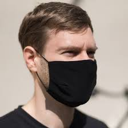

In [ ]:
data[4]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 93,  91,  92],
        [ 84,  82,  83],
        [ 80,  78,  79],
        ...,
        [186, 181, 175],
        [186, 181, 176],
        [186, 181, 178]],

       [[ 94,  92,  93],
        [ 85,  83,  84],
        [ 81,  79,  80],
        ...,
        [186, 181, 175],
        [186, 181, 176],
        [186, 181, 178]],

       [[ 97,  95,  96],
        [ 87,  85,  86],
        [ 83,  81,  82],
        ...,
        [188, 183, 177],
        [188, 183, 178],
        [188, 183, 180]],

       ...,

       [[ 93, 125, 145],
        [121, 152, 172],
        [122, 154, 173],
        ...,
        [166, 161, 158],
        [166, 161, 158],
        [165, 160, 157]],

       [[111, 144, 162],
        [120, 153, 171],
        [131, 165, 182],
        ...,
        [165, 160, 157],
        [165, 160, 157],
        [164, 159, 156]],

       [[112, 148, 163],
        [121, 157, 172],
        [133, 169, 185],
        ...,
        [164, 159, 156],
        [164, 159, 156],
        [164, 159, 156]]], dtype=uint8)
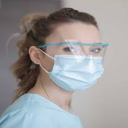

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.36470588, 0.35686275, 0.36078431],
        [0.32941176, 0.32156863, 0.3254902 ],
        [0.31372549, 0.30588235, 0.30980392],
        ...,
        [0.72941176, 0.70980392, 0.68627451],
        [0.72941176, 0.70980392, 0.69019608],
        [0.72941176, 0.70980392, 0.69803922]],

       [[0.36862745, 0.36078431, 0.36470588],
        [0.33333333, 0.3254902 , 0.32941176],
        [0.31764706, 0.30980392, 0.31372549],
        ...,
        [0.72941176, 0.70980392, 0.68627451],
        [0.72941176, 0.70980392, 0.69019608],
        [0.72941176, 0.70980392, 0.69803922]],

       [[0.38039216, 0.37254902, 0.37647059],
        [0.34117647, 0.33333333, 0.3372549 ],
        [0.3254902 , 0.31764706, 0.32156863],
        ...,
        [0.7372549 , 0.71764706, 0.69411765],
        [0.7372549 , 0.71764706, 0.69803922],
        [0.7372549 , 0.71764706, 0.70588235]],

       ...,

       [[0.36470588, 0.49019608, 0.56862745],
        [0.4745098 , 0.59607843, 0.6745098 ],
        [0.47843137, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 26ms/step - loss: 0.4213 - acc: 0.8076 - val_loss: 0.2362 - val_acc: 0.9041
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2837 - acc: 0.8919 - val_loss: 0.1911 - val_acc: 0.9256
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2324 - acc: 0.9095 - val_loss: 0.1956 - val_acc: 0.9207
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1812 - acc: 0.9299 - val_loss: 0.1661 - val_acc: 0.9339
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1484 - acc: 0.9448 - val_loss: 0.1489 - val_acc: 0.9322


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.1848 - acc: 0.9259
Test Accuracy = 0.9258769154548645


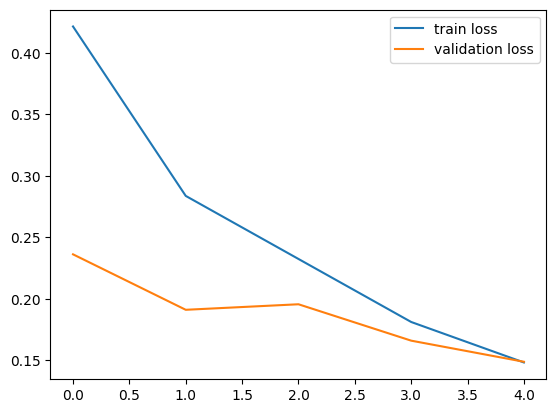

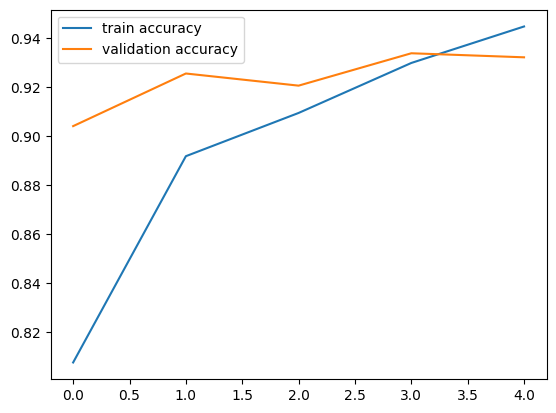

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.jpeg


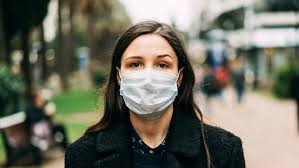

1/1 [==============================] - 1s 628ms/step
[[0.40699634 0.6334736 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.jpg


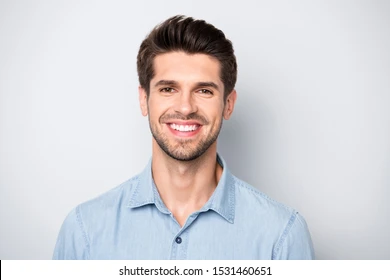

1/1 [==============================] - 0s 21ms/step
[[0.49811754 0.47740024]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')